In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_palette("husl")

In [55]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv('../data/adult.data.csv', names=columns)

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (32561, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing Values:
age               0
workclass     

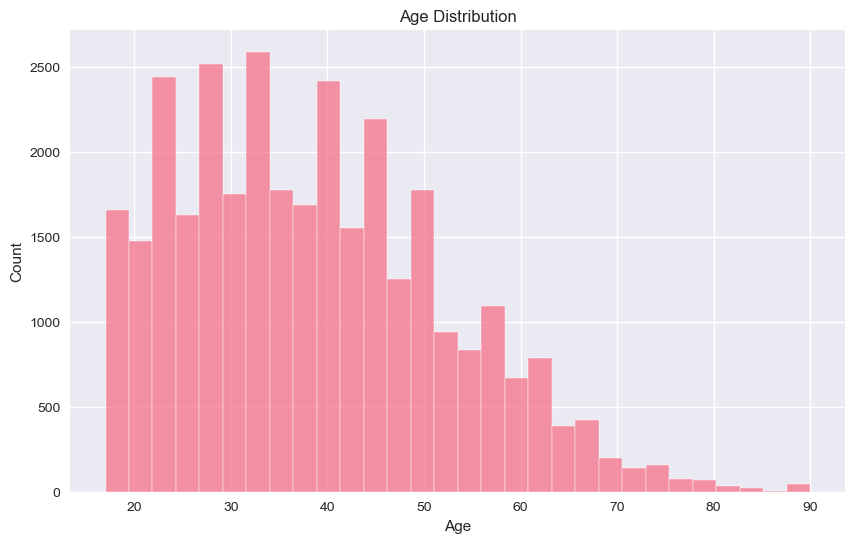

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

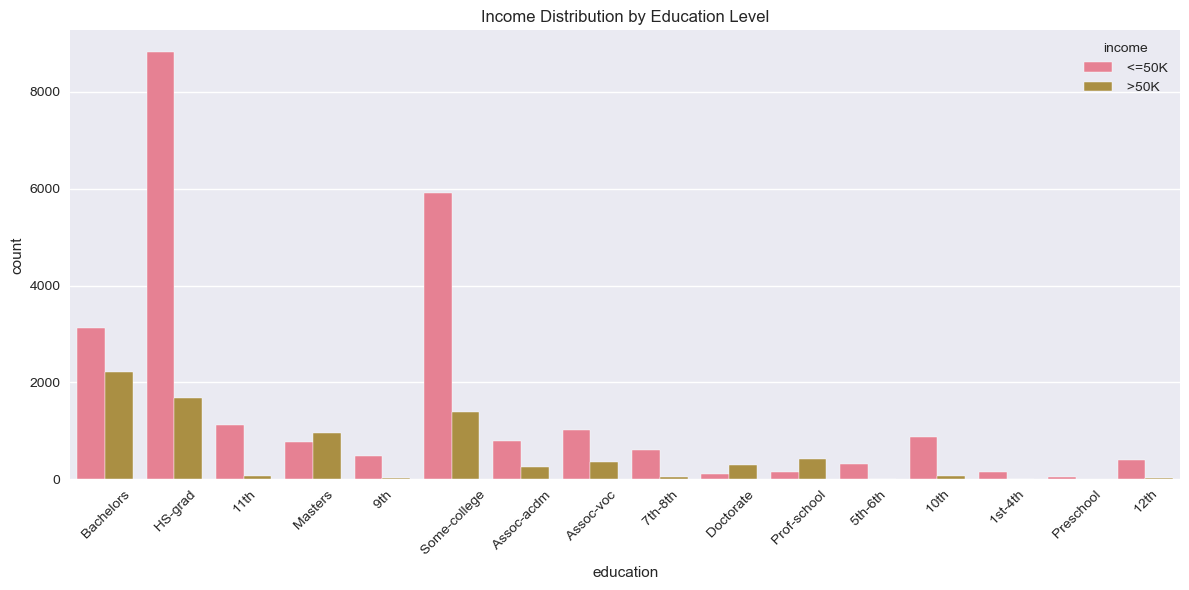

In [57]:
# 2. Income Distribution by Education
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.tight_layout()
plt.show()


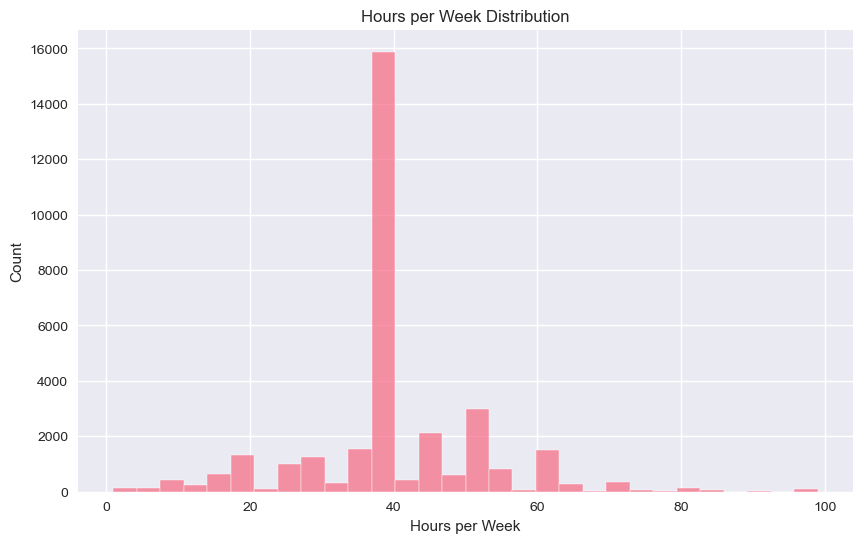

In [58]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', bins=30)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()

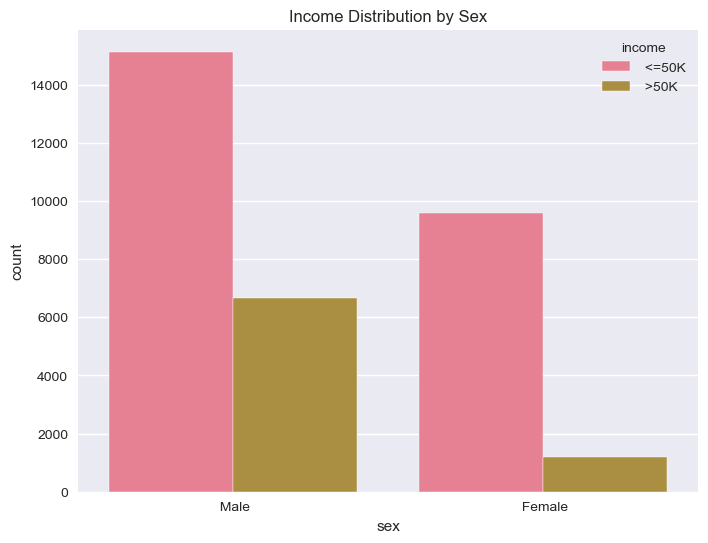

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Distribution by Sex')
plt.show()

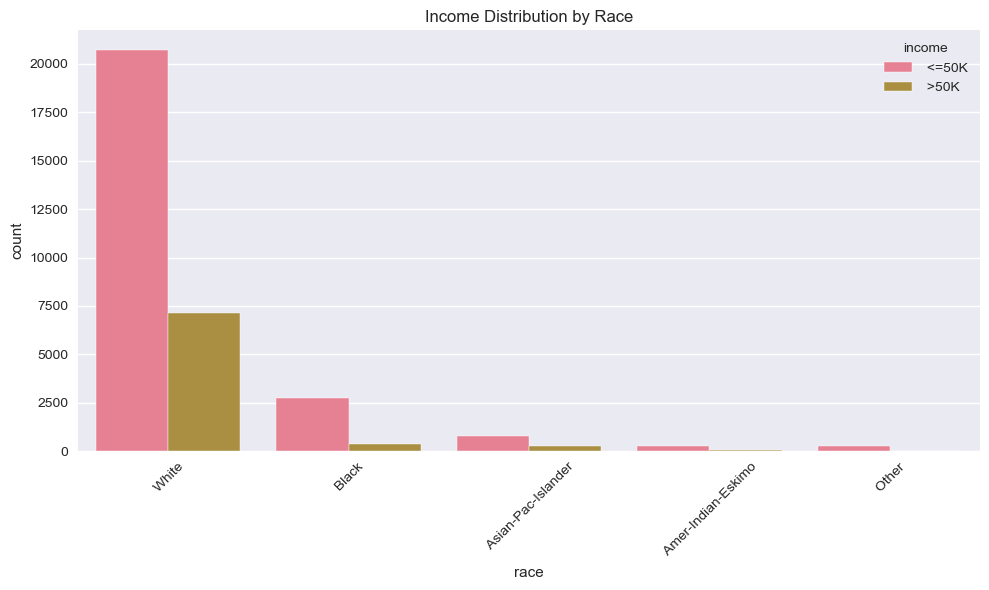

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Race')
plt.tight_layout()
plt.show()

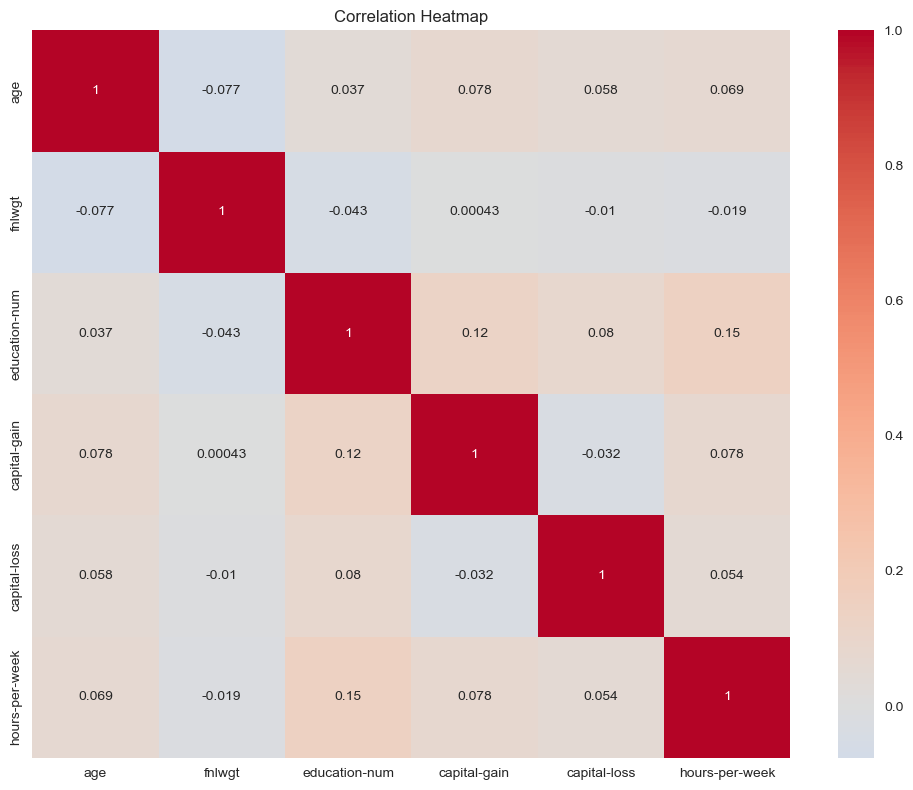

In [61]:

numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 
                 'capital-loss', 'hours-per-week']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



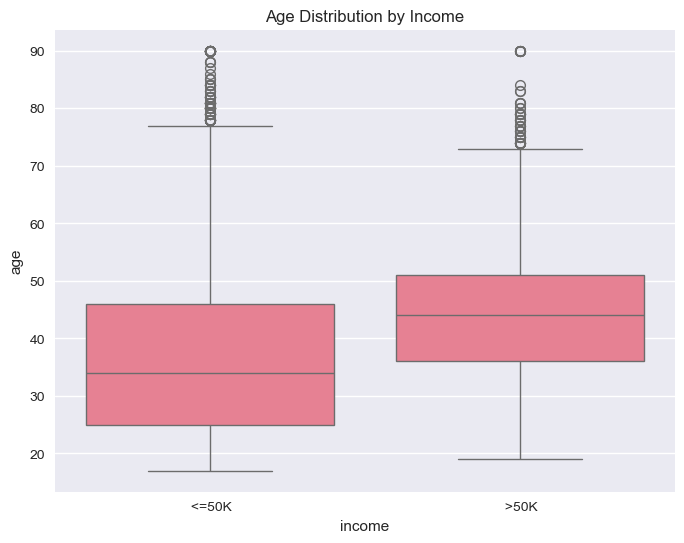

In [62]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title('Age Distribution by Income')
plt.show()


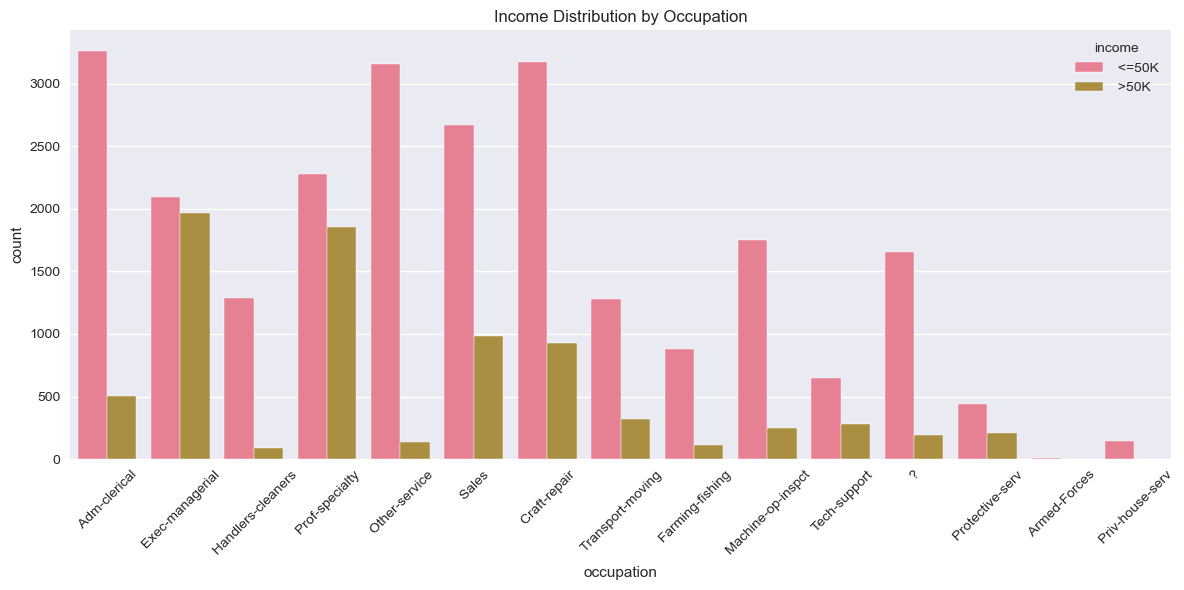

In [63]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Occupation')
plt.tight_layout()
plt.show()

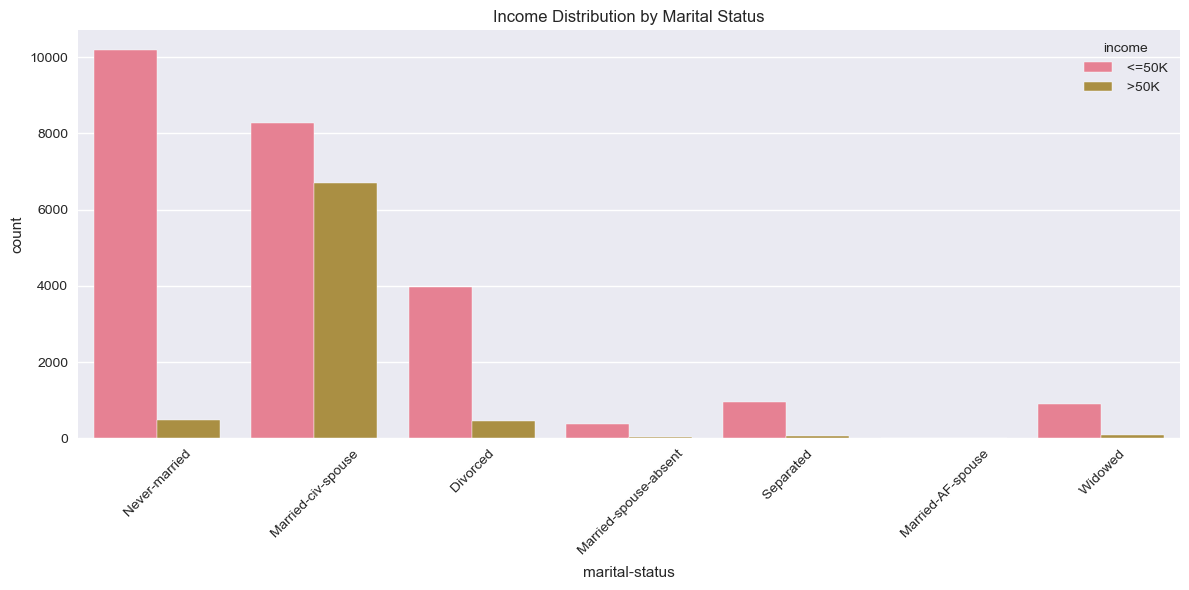

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Marital Status')
plt.tight_layout()
plt.show()

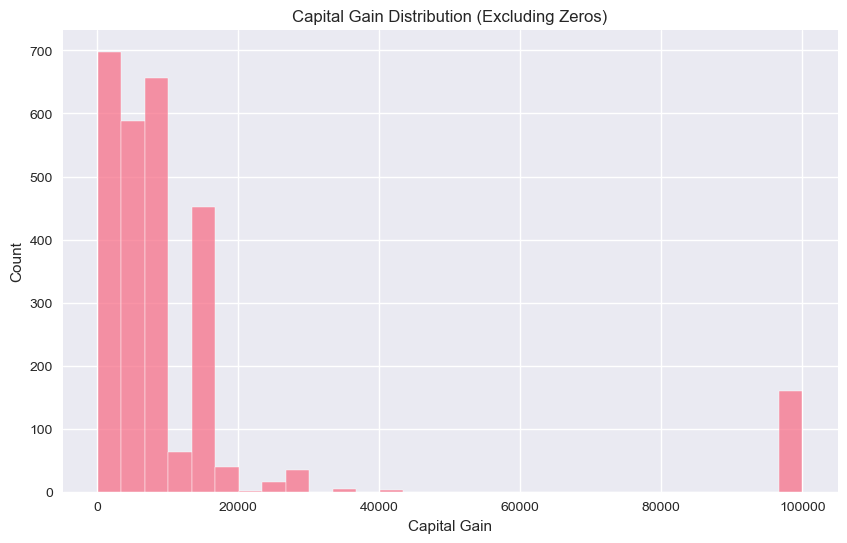

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['capital-gain'] > 0], x='capital-gain', bins=30)
plt.title('Capital Gain Distribution (Excluding Zeros)')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

In [66]:
print("\nNumerical Features Summary by Income Group:")
print(df.groupby('income')[numerical_cols].mean())



Numerical Features Summary by Income Group:
              age        fnlwgt  education-num  capital-gain  capital-loss  \
income                                                                       
<=50K   36.783738  190340.86517       9.595065    148.752468     53.142921   
>50K    44.249841  188005.00000      11.611657   4006.142456    195.001530   

        hours-per-week  
income                  
<=50K        38.840210  
>50K         45.473026  


In [67]:
for col in ['workclass', 'education', 'marital-status', 'occupation', 
            'relationship', 'race', 'sex', 'native-country']:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts(normalize=True).head())


Distribution of workclass:
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Name: proportion, dtype: float64

Distribution of education:
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
Name: proportion, dtype: float64

Distribution of marital-status:
marital-status
Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
Separated             0.031479
Widowed               0.030497
Name: proportion, dtype: float64

Distribution of occupation:
occupation
Prof-specialty     0.127146
Craft-repair       0.125887
Exec-managerial    0.124873
Adm-clerical       0.115783
Sales              0.112097
Name: proportion, dtype: float64

Distribution of relationship:
relationship
Husband          0.405178
Not-in-family    0.255060
Own-child        0.155646
Unmarried        

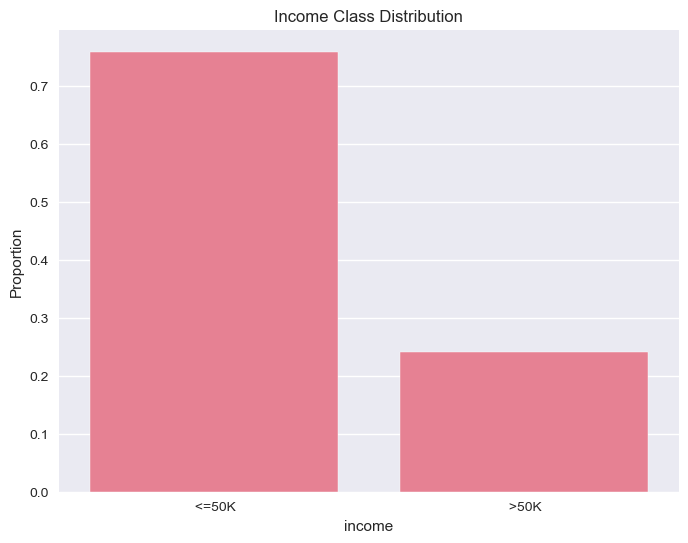


Income Class Distribution:
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [68]:
plt.figure(figsize=(8, 6))
income_dist = df['income'].value_counts(normalize=True)
sns.barplot(x=income_dist.index, y=income_dist.values)
plt.title('Income Class Distribution')
plt.ylabel('Proportion')
plt.show()
print("\nIncome Class Distribution:")
print(income_dist)


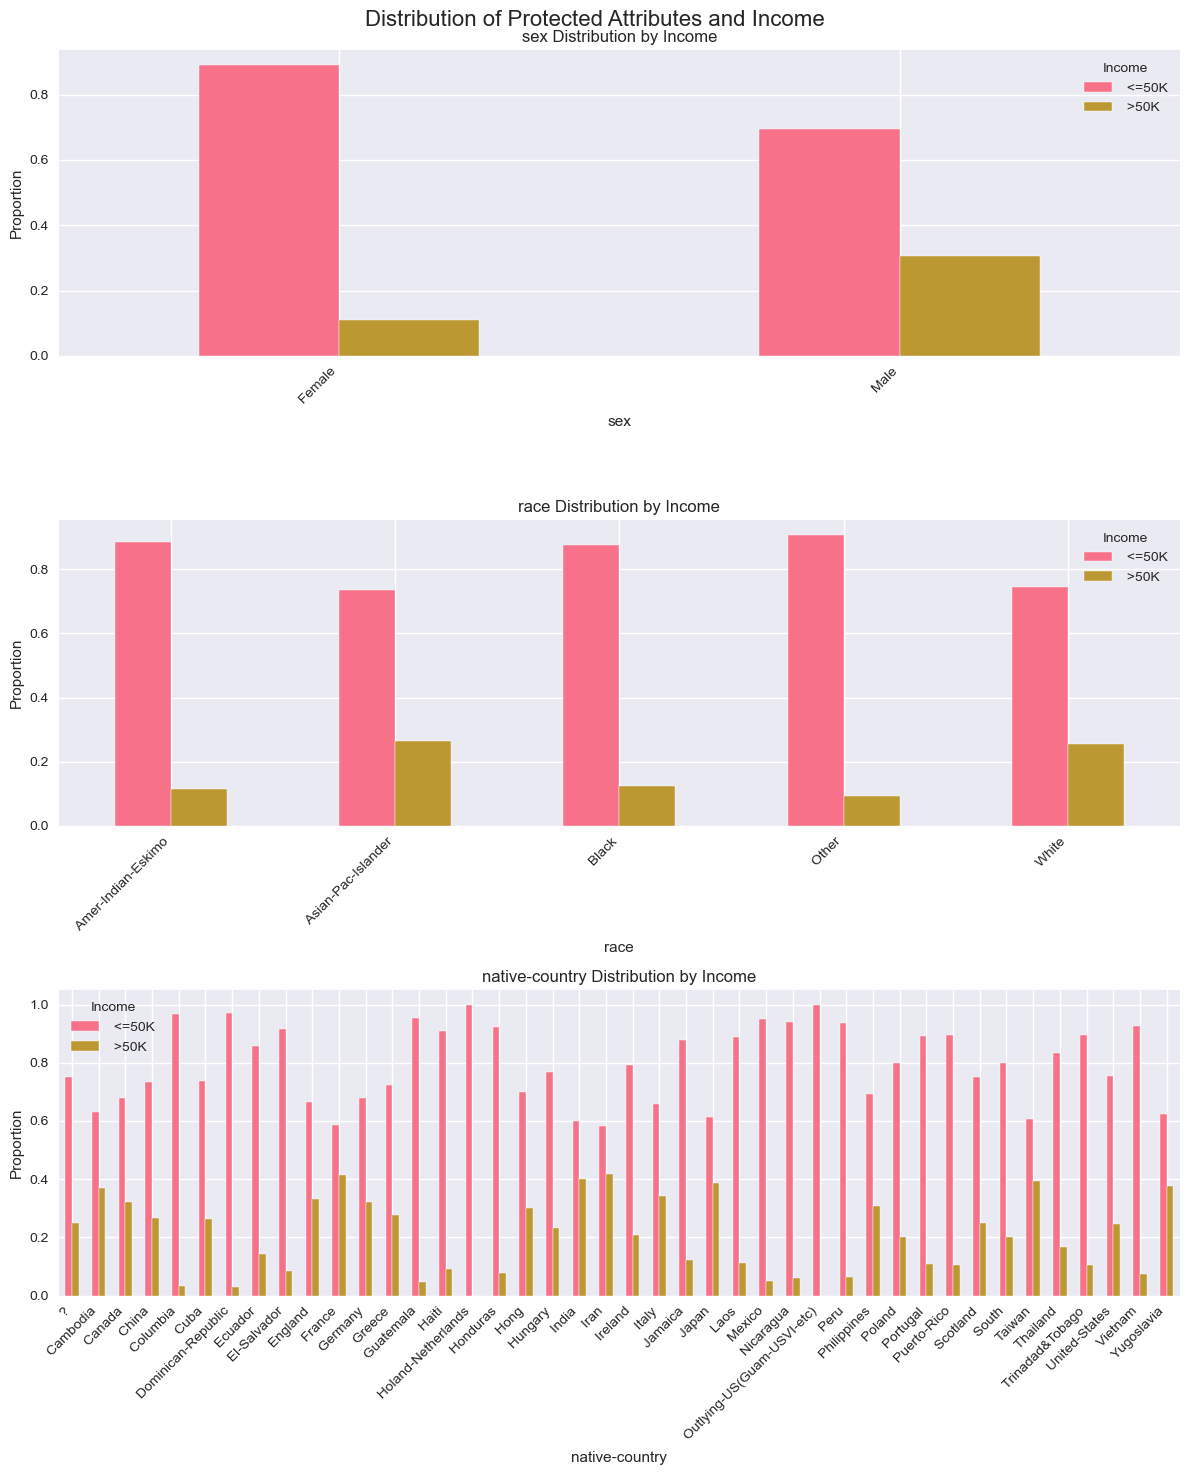

In [69]:
protected_attrs = ['sex', 'race', 'native-country']

# Create subplots for protected attributes
fig, axes = plt.subplots(len(protected_attrs), 1, figsize=(12, 5*len(protected_attrs)))
fig.suptitle('Distribution of Protected Attributes and Income', fontsize=16)

for i, attr in enumerate(protected_attrs):
    # Calculate proportions
    props = df.groupby(attr)['income'].value_counts(normalize=True).unstack()
    props.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{attr} Distribution by Income')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Income')
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



Intersectional Analysis (Sex and Race):
income                         <=50K       >50K
sex    race                                    
Female Amer-Indian-Eskimo  89.915966  10.084034
       Asian-Pac-Islander  87.572254  12.427746
       Black               94.212219   5.787781
       Other               94.495413   5.504587
       White               88.104605  11.895395
Male   Amer-Indian-Eskimo  87.500000  12.500000
       Asian-Pac-Islander  66.378066  33.621934
       Black               81.070746  18.929254
       Other               88.271605  11.728395
       White               68.243455  31.756545


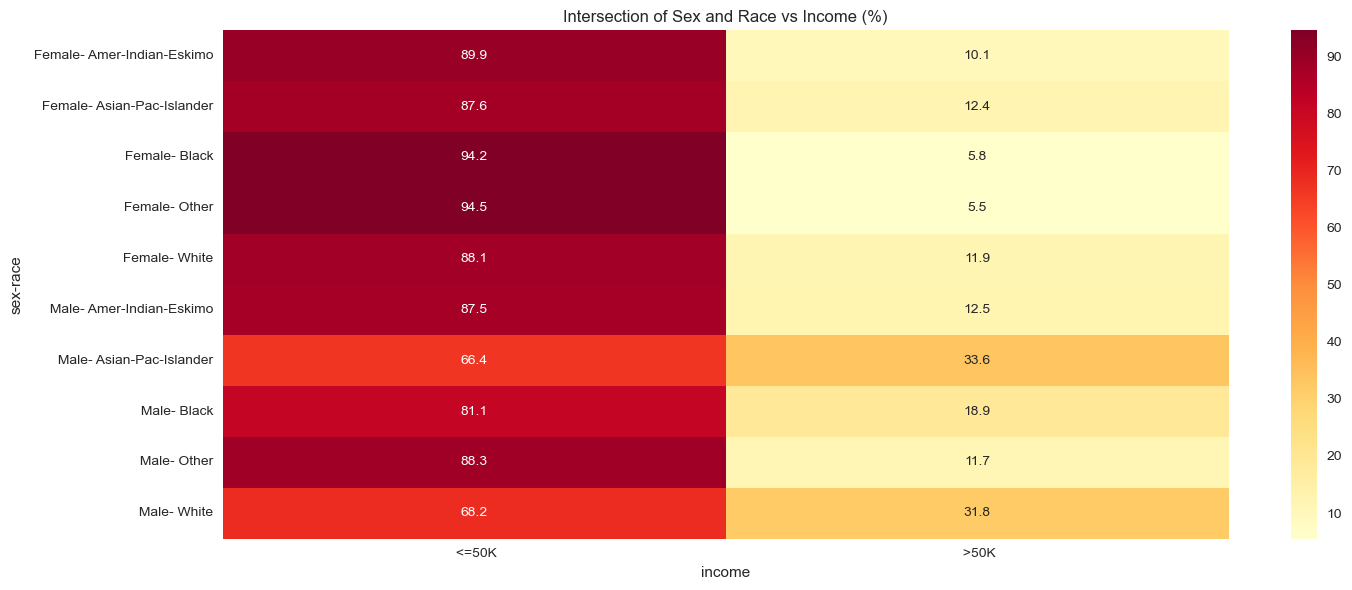

In [70]:
print("\nIntersectional Analysis (Sex and Race):")
intersection_analysis = pd.crosstab(
    [df['sex'], df['race']], 
    df['income'], 
    normalize='index'
) * 100
print(intersection_analysis)

# Visualize intersectional relationships
plt.figure(figsize=(15, 6))
sns.heatmap(intersection_analysis, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Intersection of Sex and Race vs Income (%)')
plt.tight_layout()
plt.show()

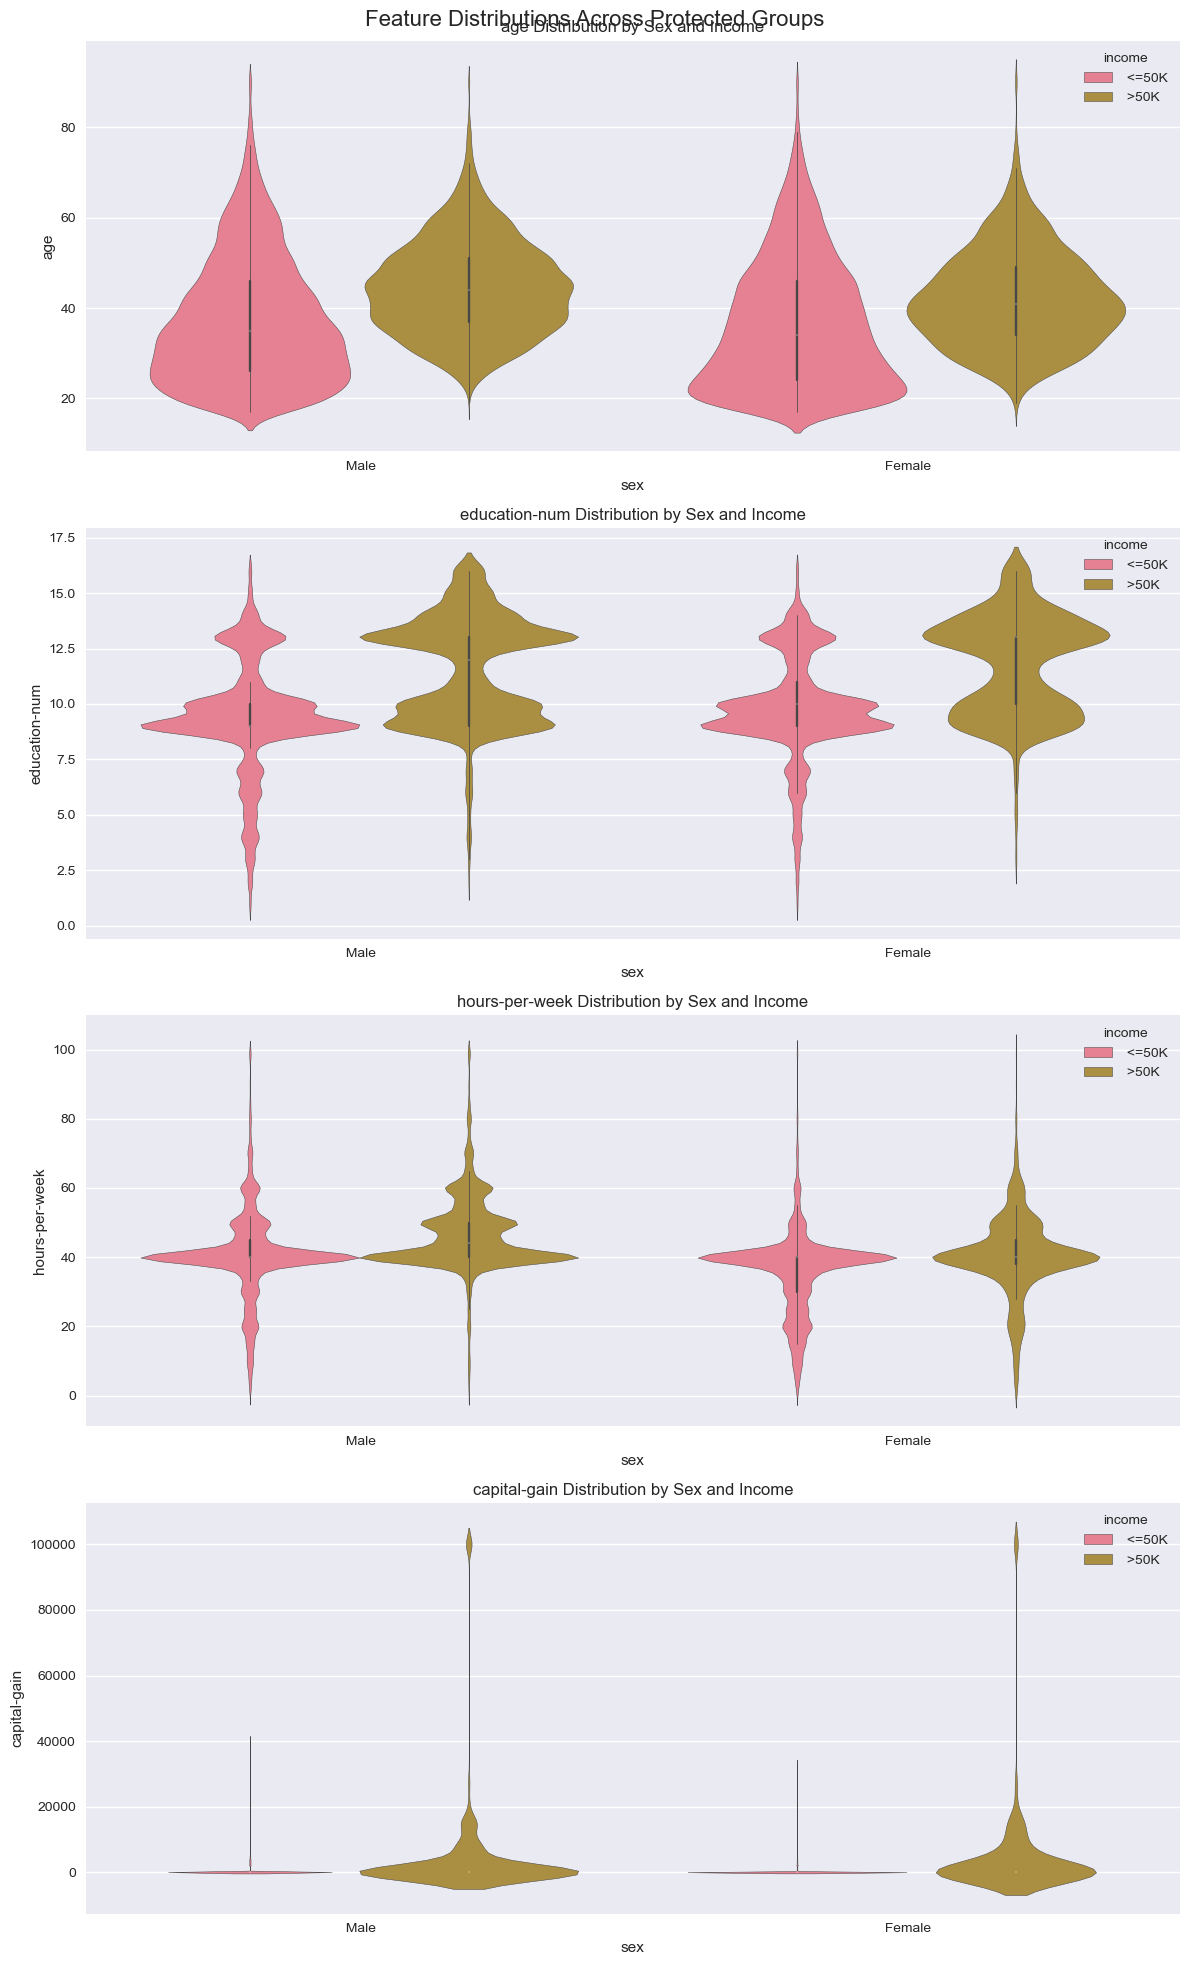

In [71]:
numerical_features = ['age', 'education-num', 'hours-per-week', 'capital-gain']

# Create violin plots for numerical features across protected groups
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 5*len(numerical_features)))
fig.suptitle('Feature Distributions Across Protected Groups', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.violinplot(data=df, x='sex', y=feature, hue='income', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Sex and Income')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


Bias Metrics for sex:
           size   size_pct  positive_rate
Male    21790.0  66.920549      30.573658
Female  10771.0  33.079451      10.946059


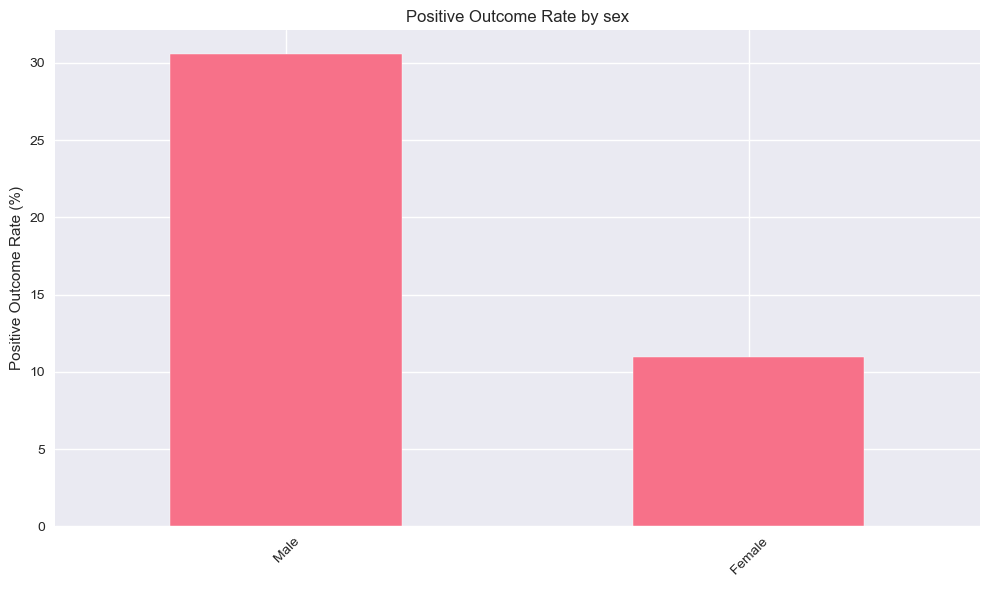


Bias Metrics for race:
                       size   size_pct  positive_rate
White               27816.0  85.427352      25.585994
Black                3124.0   9.594300      12.387964
Asian-Pac-Islander   1039.0   3.190934      26.564004
Amer-Indian-Eskimo    311.0   0.955130      11.575563
Other                 271.0   0.832284       9.225092


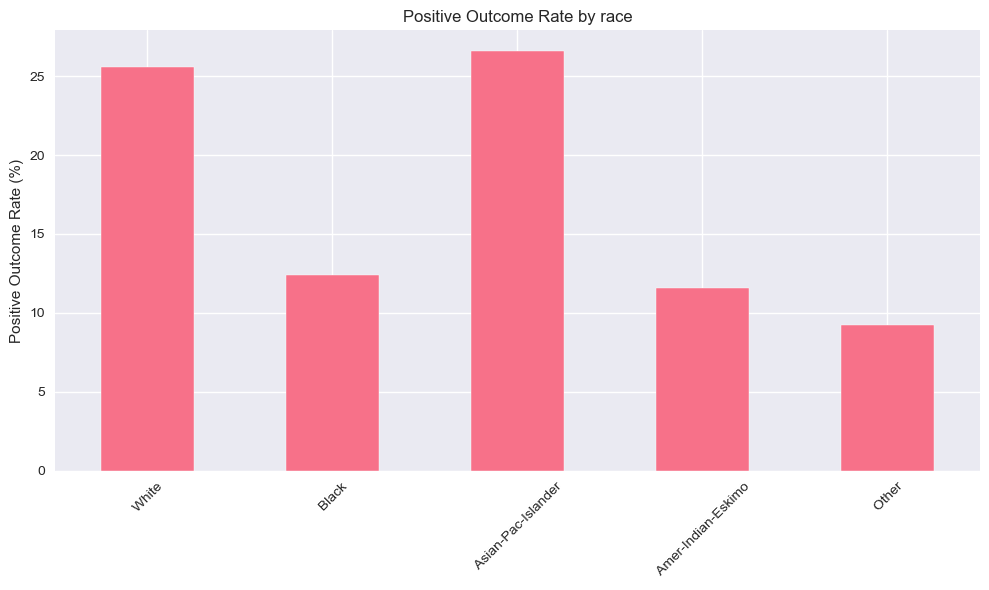


Bias Metrics for native-country:
                               size   size_pct  positive_rate
United-States               29170.0  89.585701      24.583476
Cuba                           95.0   0.291760      26.315789
Jamaica                        81.0   0.248764      12.345679
India                         100.0   0.307116      40.000000
?                             583.0   1.790486      25.042882
Mexico                        643.0   1.974755       5.132193
South                          80.0   0.245693      20.000000
Puerto-Rico                   114.0   0.350112      10.526316
Honduras                       13.0   0.039925       7.692308
England                        90.0   0.276404      33.333333
Canada                        121.0   0.371610      32.231405
Germany                       137.0   0.420749      32.116788
Iran                           43.0   0.132060      41.860465
Philippines                   198.0   0.608089      30.808081
Italy                          73.0 

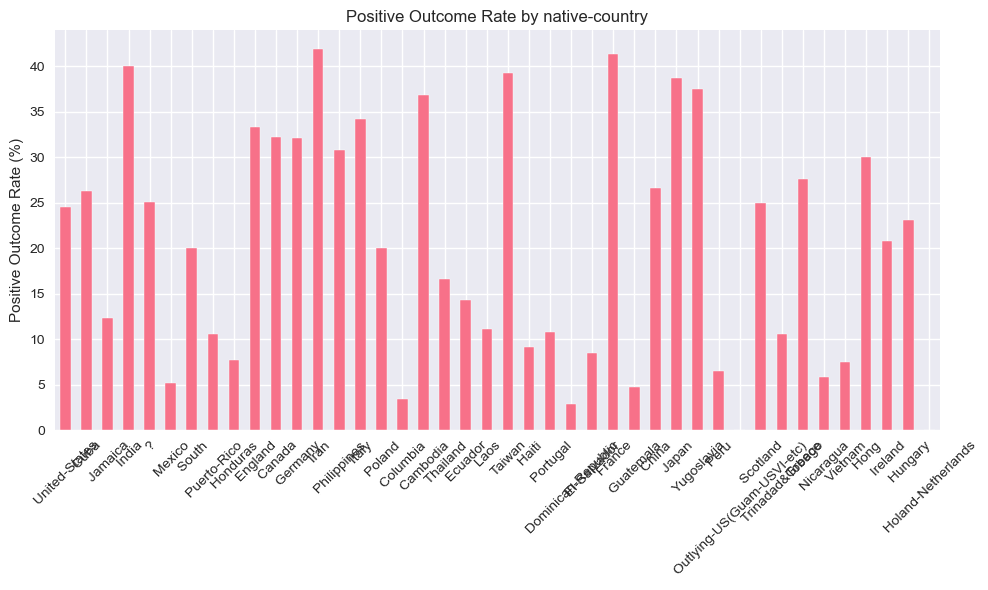

In [79]:
# Modified bias metrics calculation function
def calculate_bias_metrics(df, protected_attr):
    metrics = {}
    
    # Check if income values contain leading/trailing spaces
    positive_outcome = '>50K'  # we might need to adjust this based on the actual data format
    
    for group in df[protected_attr].unique():
        group_data = df[df[protected_attr] == group]
        total_group = len(group_data)
        positive_group = len(group_data[group_data['income'].str.strip() == positive_outcome])
        
        metrics[group] = {
            'size': total_group,
            'size_pct': total_group / len(df) * 100,
            'positive_rate': (positive_group / total_group * 100) if total_group > 0 else 0
        }
    
    return pd.DataFrame(metrics).T



for attr in protected_attrs:
    print(f"\nBias Metrics for {attr}:")
    bias_metrics = calculate_bias_metrics(df, attr)
    print(bias_metrics)
    
    plt.figure(figsize=(10, 6))
    bias_metrics['positive_rate'].plot(kind='bar')
    plt.title(f'Positive Outcome Rate by {attr}')
    plt.ylabel('Positive Outcome Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




<Figure size 1200x600 with 0 Axes>

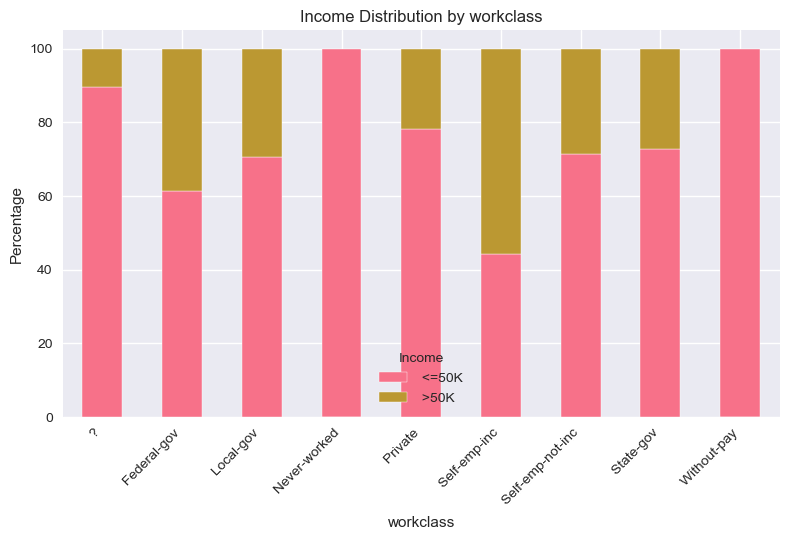

<Figure size 1200x600 with 0 Axes>

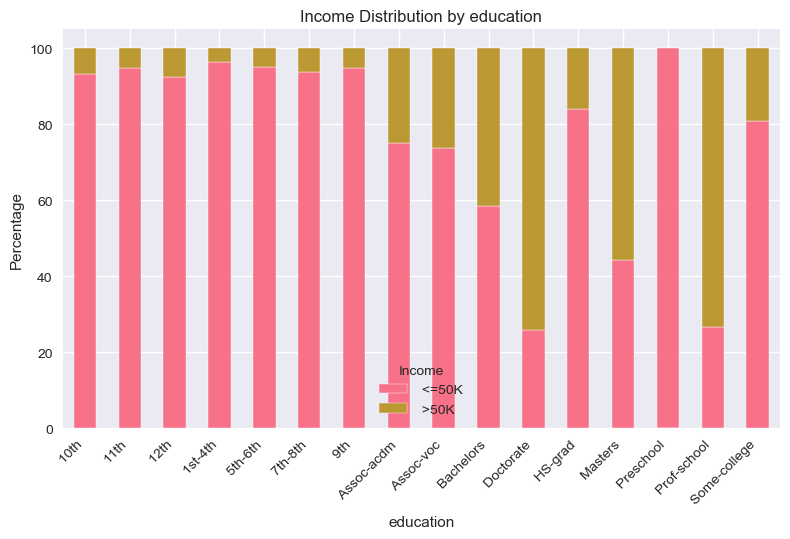

<Figure size 1200x600 with 0 Axes>

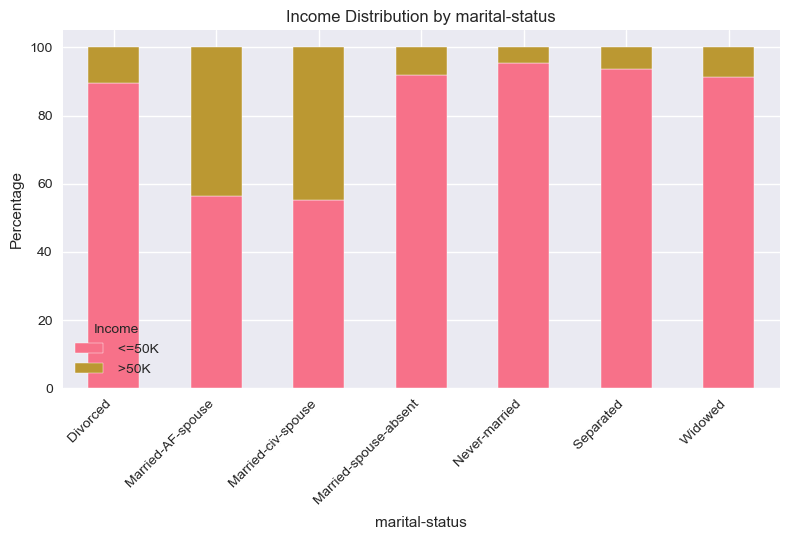

<Figure size 1200x600 with 0 Axes>

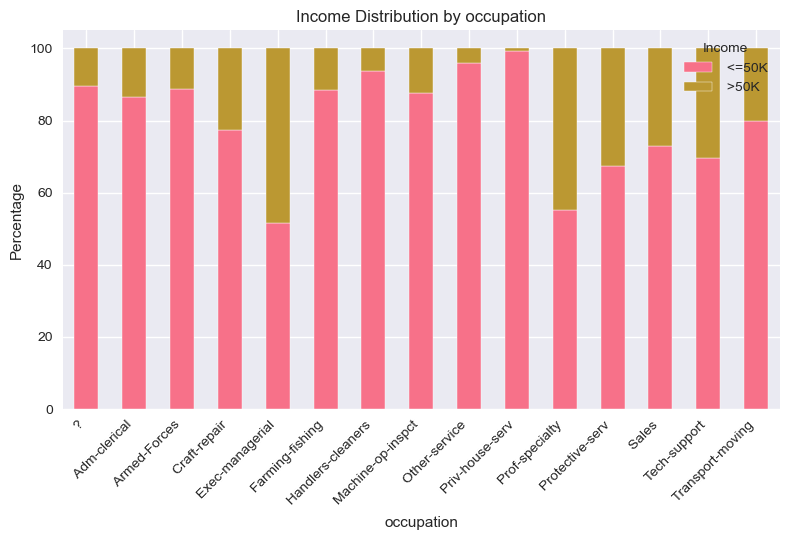

<Figure size 1200x600 with 0 Axes>

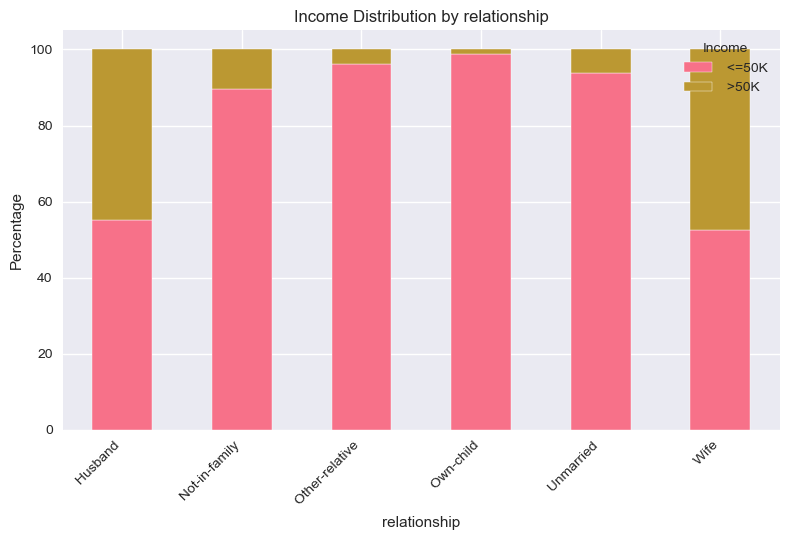

In [73]:
categorical_features = ['workclass', 'education', 'marital-status', 
                       'occupation', 'relationship']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    feature_dist = pd.crosstab(df[feature], df['income'], normalize='index') * 100
    feature_dist.plot(kind='bar', stacked=True)
    plt.title(f'Income Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title='Income')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [74]:
print("\nStatistical Tests for Independence:")
for feature in protected_attrs + categorical_features:
    contingency_table = pd.crosstab(df[feature], df['income'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"\n{feature}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.2e}")


Statistical Tests for Independence:

sex:
Chi-square statistic: 1517.81
p-value: 0.00e+00

race:
Chi-square statistic: 330.92
p-value: 2.31e-70

native-country:
Chi-square statistic: 317.23
p-value: 2.21e-44

workclass:
Chi-square statistic: 1045.71
p-value: 2.03e-220

education:
Chi-square statistic: 4429.65
p-value: 0.00e+00

marital-status:
Chi-square statistic: 6517.74
p-value: 0.00e+00

occupation:
Chi-square statistic: 4031.97
p-value: 0.00e+00

relationship:
Chi-square statistic: 6699.08
p-value: 0.00e+00


In [75]:
for attr in protected_attrs:
    group_sizes = df[attr].value_counts()
    group_income = df.groupby(attr)['income'].value_counts(normalize=True).unstack()
    
    print(f"\nGroup Analysis for {attr}:")
    print("\nGroup Sizes:")
    print(group_sizes)
    print("\nIncome Distribution within Groups:")
    print(group_income)



Group Analysis for sex:

Group Sizes:
sex
Male      21790
Female    10771
Name: count, dtype: int64

Income Distribution within Groups:
income     <=50K      >50K
sex                       
Female  0.890539  0.109461
Male    0.694263  0.305737

Group Analysis for race:

Group Sizes:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

Income Distribution within Groups:
income                 <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.884244  0.115756
Asian-Pac-Islander  0.734360  0.265640
Black               0.876120  0.123880
Other               0.907749  0.092251
White               0.744140  0.255860

Group Analysis for native-country:

Group Sizes:
native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                   